In [1]:
import pandas as pd
import numpy as np

import os.path

training_data = pd.read_parquet(os.path.join("data", "training.parquet"))

In [4]:
training_data.sample(10)

,Message,Subject,Catagory
15910,In article <C5s6As.Kwo@murdoch.acc.Virginia.ED...,Re: Who's next? Mormons and Jews?,talk.politics.guns
8000,In article <Lauger-240393141539@lauger.mdc.com...,Re: Sinus vs. Migraine (was Re: Sinus Endoscopy),sci.med
1618,aas7@po.CWRU.Edu (Andrew A. Spencer) writes:\n...,Re: Nissan Nomenclature (was Re: Manual Shift ...,rec.autos
7582,douglas craig holland (holland@CS.ColoState.ED...,"Re: Once tapped, your code is no good any more.",sci.crypt
2323,In article <C5MqK0.F29@liverpool.ac.uk> wis@li...,Re: PDS vs. Nubus (was Re: LC III NuBus Capable?),comp.sys.mac.hardware
11290,\nThe situation: running a Fortran executable ...,"Xterm Problem With Input Focus / ""Shuffle Up""",comp.windows.x
4113,"In article <C5sMzy.BDE@ra.nrl.navy.mil>, klink...",Re: Jays' Darrin Jackson is a nightmare!,rec.sport.baseball
15078,"[Joe, why don't you put your username on your ...",Re: CLINTON JOINS LIST OF GENOCIDAL SOCIALIST ...,talk.politics.guns
13690,"*** On 04-19-93 03:53, Wayne Mcdougall had th...",Netware server 286a and s,comp.sys.ibm.pc.hardware
9098,In article <pdb059-160493111229@kilimanjaro.jp...,Re: Once more into the breach....,talk.politics.misc


In [5]:
import cloudpickle as cp
feature_pipeline = cp.load(open('feature_pipeline.sav', 'rb'))

In [6]:
train_vecs = feature_pipeline.fit_transform(training_data["Subject"]+training_data["Message"])
train_vecs

<13947x2048 sparse matrix of type '<class 'numpy.float64'>'
	with 1238232 stored elements in Compressed Sparse Row format>

In [9]:
from sklearn import naive_bayes

In [10]:
nb=naive_bayes.MultinomialNB()

nb.fit(vecs, training_data["Catagory"])

MultinomialNB()

In [11]:
nb.score(vecs, training_data["Catagory"])

0.8538036853803685

In [21]:
testing_data = pd.read_parquet(os.path.join("data", "testing.parquet"))
testing_vecs=feature_pipeline.transform(testing_data["Subject"]+testing_data["Message"])

In [22]:
testing_vecs

<5977x2048 sparse matrix of type '<class 'numpy.float64'>'
	with 522240 stored elements in Compressed Sparse Row format>

In [23]:
nb.score(testing_vecs, testing_data["Catagory"])

0.7821649657018571

In [24]:
from mlworkflows import plot

In [27]:
df, chart =plot.confusion_matrix(testing_data.Catagory, nb.predict(testing_vecs))

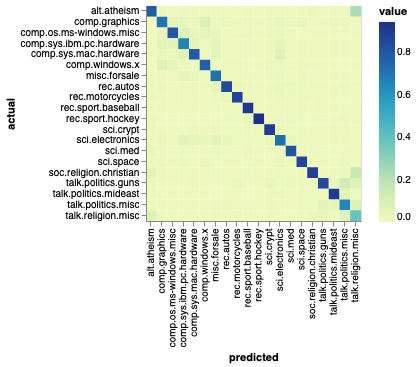

In [28]:
chart

In [30]:
from sklearn.metrics import classification_report
print(classification_report(testing_data.Catagory, nb.predict(testing_vecs)))

                          precision    recall  f1-score   support

             alt.atheism       0.69      0.77      0.73       284
           comp.graphics       0.68      0.70      0.69       303
 comp.os.ms-windows.misc       0.74      0.79      0.77       293
comp.sys.ibm.pc.hardware       0.67      0.65      0.66       303
   comp.sys.mac.hardware       0.74      0.78      0.76       286
          comp.windows.x       0.77      0.76      0.76       280
            misc.forsale       0.83      0.71      0.76       305
               rec.autos       0.82      0.84      0.83       300
         rec.motorcycles       0.89      0.86      0.88       317
      rec.sport.baseball       0.90      0.91      0.90       291
        rec.sport.hockey       0.93      0.94      0.94       310
               sci.crypt       0.88      0.89      0.89       303
         sci.electronics       0.66      0.72      0.68       274
                 sci.med       0.89      0.81      0.85       314
         